# The euclidean space

This chapter  establishes a link between the notion of vector space with elementary notions of geometry. It is by introducing the dot product operation that we get the notions of norm, distance and angle. An **euclidean space** is a finite-dimensional vector space constructed over $\mathbb{R}^n$ which is provided with an operation called the dot product. The dot product makes it possible to construct a formalization of the notions of vector length and angles between vectors. All this makes classical geometry (Euclid's geometry) computable and generalizable to cases of more than 2 and 3 dimensions.

In a context of language modeling, the notions described in this chapter make it possible to formalize notions such as similarity or dissimilarity between language units, such as words, sentences, documents when represented by high dimensional vectors. 
This chapter eventually illustrates the application of high dimensional euclidean geometry to elementary information retrieval.

## Dot product

Given vectors $\mathbf{x} \in \mathbb{R}^n$ and $\mathbf{y} \in \mathbb{R}^n$ the **dot product** is a function of $\mathbb{R} \times \mathbb{R} \mapsto \mathbb{R}$ defined as:

$$
\mathbf{x}^\top \mathbf{y} = x_1 y_1 + \ldots + x_n y_n =  \sum_{i=1}^n x_i y_i
$$

Most of the time we write the dot product $\mathbf{x}^\top \mathbf{y}$ but we'll sometimes also use  $\mathbf{x} \cdot \mathbf{y}$ and we also find
 $\langle \mathbf{x},\mathbf{y} \rangle$.
 The dot product is **commutative** thus $\mathbf{x}^\top \mathbf{y} = \mathbf{y}^\top \mathbf{x}$, it is **positive definite** that is $\mathbf{x} ^\top \mathbf{x} \geq 0$ and equals 0 if and only if $\mathbf{x}=\mathbf{0}$. Finally it is **bilinear**, that is:
 
 $$
\begin{align}
  a (\mathbf{x} \top \mathbf{y}) &=  (a \mathbf{x}^\top \mathbf{y})
                                    = (\mathbf{x}^\top a\mathbf{y})\\
      (\mathbf{x} + \mathbf{y})^\top \mathbf{z}   &=    (\mathbf{x}^\top
                                                      \mathbf{z}) +   (\mathbf{y}^\top
                                                      \mathbf{z}) \\
\mathbf{x}^\top  (\mathbf{y} + \mathbf{z})   &=    (\mathbf{x}^\top
                                                      \mathbf{y}) +   (\mathbf{x}^\top
                                                      \mathbf{z}) 
\end{align}
$$

 `````{admonition} Example
:class: tip
 Here's an example:

$$
\begin{bmatrix}
 -1\\
 2\\
 2
\end{bmatrix}^\top 
\begin{bmatrix}
1\\
0\\
-3
\end{bmatrix}
=-1 + 0 + -6 = -7
$$
`````

 `````{admonition} Example (lookup)
:class: tip
  The dot product $\mathbf{e}\cdot \mathbf{x}$ involving a unit vector $\mathbf{e}$ valued at 1 at position $j$ has the effect of **looking up** the value at position $j$ in $\mathbf{x}$. For example:

$$
  \begin{bmatrix}
    0\\1\\0\\0
  \end{bmatrix}^T
  \begin{bmatrix}
    21\\12\\-7\\3
  \end{bmatrix}
  =  0 +  12 +0 + 0= 12
$$ 
 `````

 `````{admonition} Example (mean and average)
:class: tip

We get the **sum** of the vector components by computing the dot product with vector $\mathbf{1}$. For instance:

$$
   \begin{bmatrix}
    1\\1\\1\\1 
  \end{bmatrix}^T
  \begin{bmatrix}
    21\\12\\-7\\3 
  \end{bmatrix}
  =
21+12-7+3 = 29
$$

We can also compute the **average** of vector $\mathbf{x}$ with size $k$ by computing
 $\frac{1}{k} \mathbf{1}^T \mathbf{x} $, as illustrated here~:

$$
\frac{1}{4}
   \begin{bmatrix}
    1\\ 1 \\\ 1 \\ 1 
  \end{bmatrix}^T
  \begin{bmatrix}
    24\\16\\4\\0 
  \end{bmatrix}
  =
\frac{1}{4}(24+16+4+0) = 11
$$

 `````

`````{admonition} Example (sum of squares)
:class: tip
We get the **sum of squares** of a vector's elements by computing $\mathbf{x}^\top \mathbf{x}$:

$$
\begin{bmatrix}
    7\\2\\-3
  \end{bmatrix}^T
  \begin{bmatrix}
    7\\2\\-3
  \end{bmatrix}
  =
  49+4+9 = 62
$$
`````

## Euclidean norm

The **euclidean norm** of vector $\mathbf{x}\in\mathbb{R}^n$, written $||\mathbf{x}||$
is the map $\mathbb{R}^n \mapsto \mathbb{R}_+$ such that:

$$
||\mathbf{x}|| = \sqrt{x_1^2+\ldots + x_n^2}
$$

This is the square root of the sum of squares of $\mathbf{x}$. The following definition is equivalent:

$$
||\mathbf{x}|| = \sqrt{\mathbf{x}^T\mathbf{x}}
$$

The norm is **positive definite**, that is $||\mathbf{x}|| \geq 0$ and $||\mathbf{x}|| = 0$ if and only if $\mathbf{x} = 0$. The norm is **homogeneous**, that is $||\lambda \mathbf{x} || = |\lambda|\, || \mathbf{x} || $. And critically the norm satisfies the **triangular inequality**, that is $||\mathbf{x} + \mathbf{y}|| \leq ||\mathbf{x}|| + ||\mathbf{y}||$.


````{admonition} Note (norm and Pythagoras theorem)
The norm is a quantity that can be interpreted as the length of a vector. This can be illustrated from the 2D case where the norm of a vector is the square root of the hypothenuse of  a right-angle triangle. Thus the norm definition is just an application of  Pythagoras theorem for the 2D case.  Here is how it works:

$$
\begin{align}
\mathbf{x} &= \begin{bmatrix}x_1\\x_2\end{bmatrix}\\
||\mathbf{x}|| &= \sqrt{x^2_1 + x^2_2}
\end{align}
$$
````

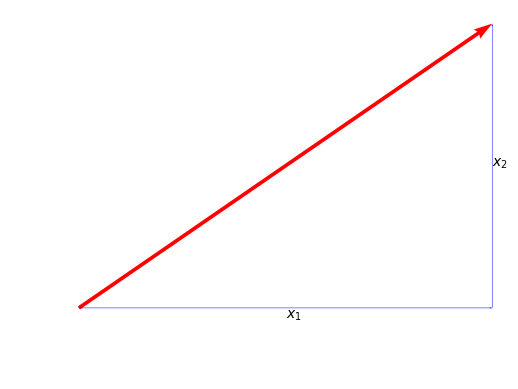

In [1]:
from myst_nb import glue
import numpy as np
import matplotlib.pyplot as plt
f,ax = plt.subplots()
ax.set_xlim([-0.5,3.1])
ax.set_ylim([-0.5,2.1])
ax.set_axis_off()
V = [3,2]
ax.quiver(0, 0, V[0], V[1], angles='xy', scale_units='xy', scale=1, color='r')
ax.quiver(3, 0, 0, V[1], angles='xy', scale_units='xy', scale=1, color='b', width=0.001)
ax.quiver(0, 0, V[0], 0, angles='xy', scale_units='xy', scale=1, color='b',width=0.001)
ax.annotate("$x_2$",(3,1),horizontalalignment='left')
ax.annotate("$x_1$",(1.5,0),verticalalignment='top')

glue("geom_vector", f, display=False)

````{admonition} Note (triangular inequality)
The triangular inequality is a formalization of the statement : "the shortest past between two points is the straight line"

$||\mathbf{x} + \mathbf{y}|| \leq ||\mathbf{x}|| + ||\mathbf{y}||$.

The inequality becomes an equality when $\mathbf{x}$ and $\mathbf{y}$ are colinear. Here is an illustration for the 2D case
````

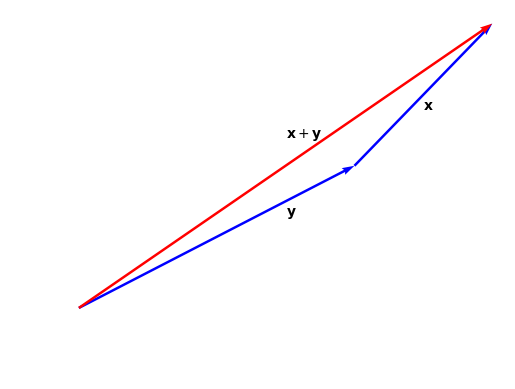

In [2]:
from myst_nb import glue
import numpy as np
import matplotlib.pyplot as plt
f,ax = plt.subplots()
ax.set_xlim([-0.5,3.1])
ax.set_ylim([-0.5,2.1])
ax.set_axis_off()
ax.quiver(0, 0, 2, 1, angles='xy', scale_units='xy', scale=1, color='b',width=0.005)
ax.quiver(2, 1, 1, 1, angles='xy', scale_units='xy', scale=1, color='b', width=0.005)
ax.quiver(0, 0, 3, 2, angles='xy', scale_units='xy', scale=1, color='r', width=0.005)


ax.annotate("$\mathbf{x}$",(2.5,1.4))
ax.annotate("$\mathbf{y}$",(1.5,0.65))
ax.annotate("$\mathbf{x}+\mathbf{y}$",(1.5,1.2))

glue("geom_vector", f, display=False)

## Euclidean distance

Informally the euclidean distance is defined as the distance between the two endpoints of the vectors.
The vector linking two vectors $\mathbf{x}$ and $\mathbf{y}$ is the vector $\mathbf{x}-\mathbf{y}$.
Then the **euclidean distance** is the norm of this vector:

$$
\text{DIST}(\mathbf{x},\mathbf{y}) = || \mathbf{x}-\mathbf{y} ||
$$

````{admonition} Note (parallelogram law of vector substraction)

The distance definition is intuitive again in the 2D case. It consists of expressing the
parallelogram law of vector substraction. 

$$
\begin{align}
\mathbf{x} - \mathbf{y} & =\begin{bmatrix} x_1\\x_2 \end{bmatrix} - \begin{bmatrix} y_1\\y_2 \end{bmatrix} \\
& =\begin{bmatrix}
x_1 - y_1\\
x_2 - y_2 
\end{bmatrix}
\end{align}
$$
````

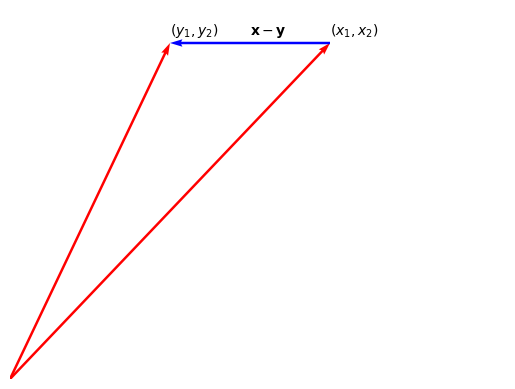

In [3]:
from myst_nb import glue
import numpy as np
import matplotlib.pyplot as plt
f,ax = plt.subplots()
ax.set_xlim([-0.,3.1])
ax.set_ylim([-0.,1.1])
ax.set_axis_off()
ax.quiver(0, 0, 1, 1, angles='xy', scale_units='xy', scale=1, color='r', width=0.005)
ax.quiver(0, 0, 2, 1, angles='xy', scale_units='xy', scale=1, color='r', width=0.005)
ax.quiver(2, 1, -1, 0, angles='xy', scale_units='xy', scale=1, color='b', width=0.005)

ax.annotate("($x_1,x_2$)",(2,1.01), verticalalignment="bottom")
ax.annotate("$(y_1,y_2)$", (1,1.01),verticalalignment="bottom")
ax.annotate("$\mathbf{x}-\mathbf{y}$", (1.5,1.01),verticalalignment="bottom")

glue("geom_vector", f, display=False)

## Angles


The **angle** $\theta$ between two vectors $\mathbf{x}$ and $\mathbf{y}$ is defined from its cosine, which is the ratio between the dot product of the two vectors and their respective norms: 

$$
\cos\theta = \frac{\mathbf{x}^\top \mathbf{y}}{||\mathbf{x}|| ||\mathbf{y}||}
$$

The remainder of this section aims at justifying this definition.  The main result justifying this definition in generality is the 
**Cauchy-Schwarz** inequality that upper bounds the absolute value of the dot product:

$$
| \mathbf{x}^\top \mathbf{y} |   \leq ||\mathbf{x}|| \, ||\mathbf{y}||
$$

this inequality proven for any euclidean space, irrespective of its dimension, implies that $ \frac{\mathbf{x}^\top \mathbf{y}}{||\mathbf{x}|| ||\mathbf{y}||}$
has values in $[-1,1]$ and can therefore be interpreted as a cosine function that also returns values in this interval.

````{admonition} Note (vector similarity)
From trigonometry, we know that acute angles have $\cos\theta \in ]0,1]$ while obtuse angles have  $\cos\theta \in [-1,0[$, 
and from the definition of the cosine we can deduce that when $\mathbf{x}^\top \mathbf{y} > 0$ the two vectors have an acute angle and head in the same direction. When $\mathbf{x}^\top \mathbf{y} < 0$ the two vectors have an obtuse angle and head in opposite directions.
The greater the dot product (or the cosine) the most similar the vectors, the lesser the dot product (or the cosine) the most dissimilar are the vectors.
Thus when the dot product is positive the angle is acute (an acute angle has cos > 0) and both vectors head in the same direction
when dot product is negative, the angle is obtuse and vectors head in opposite directions. When dot product is 0, vectors are orthogonal.

````


The proof of Cauchy-Schwarz inequality is non intuititive, however we can illustrate how the cosine definition given here makes sense in the 2D case. To do that we establish two preliminary results: the  law of cosines, that generalizes Pythagoras theorem to triangles without right angle, and a square identity.

````{prf:definition}
:label: trigonometry
Let $a,b,c$ be the sides length of triangle whose right angle is between $a$ and $b$
and let $\theta$ be the angle between $a$ and $c$. Then

$$
\begin{align}
\sin\theta &= \frac{b}{c}\\
\cos\theta &=\frac{a}{c}\\
\tan\theta &=\frac{b}{a}
\end{align}
$$

````

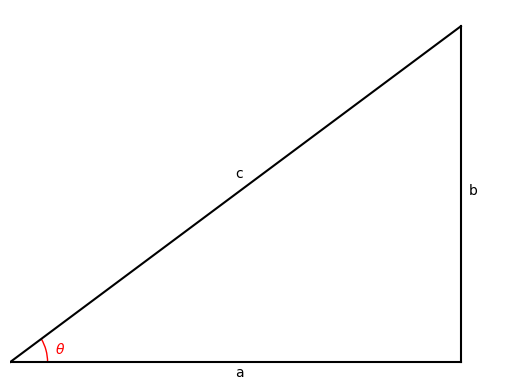

In [4]:
from myst_nb import glue
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


f,ax = plt.subplots()
ax.set_xlim([-0.,3.3])
ax.set_ylim([-0.1,2.1])
ax.set_axis_off()
ax.plot([0,3],[0,0],color='black')
ax.plot([3,3],[0,2],color='black')
ax.plot([0,3],[0,2],color='black')

ax.annotate("b",(3.05,1.),horizontalalignment="left")
ax.annotate("a", (1.5,-0.1),verticalalignment="bottom")
ax.annotate("c", (1.5,1.1))
ax.annotate(r"$\theta$", (0.3,0.05),color="red")
pac = mpatches.Arc([0, 0], 0.5, 0.5, angle=0, theta1=0, theta2=33.69,color="red")
ax.add_patch(pac)

glue("geom_vector", f, display=False)

````{prf:lemma} 
:label: sqsinusoids
We prove that $\cos^2\theta + \sin^2\theta = 1$ in a right angled triangle.

$$
\begin{align}
\cos^2\theta + \sin^2\theta &= \frac{a^2}{c^2} + \frac{b^2}{c^2}\\
&=  \frac{a^2}{a^2+b^2} + \frac{b^2}{a^2+b^2}&(\text{Pythagoras})\\
&= \frac {a^2+b^2}{a^2+b^2}\\
&= 1
\end{align}
$$
````




````{prf:lemma} Law of Cosines
:label: lawcosines
We prove that $c^2 = a^2 + b^2 - 2ab\cos\theta$ when $\theta$ is an acute angle between sides of length $a$ and $b$.
The law of cosines generalizes Pythagoras since the triangle is not required to have a right angle.
To establish the proof we first make explicit two right angled triangles in our original triangle (dotted line). 
Then we compute the blue quantities with the trigonometric definitions given above. Then we can express $c$
as a function of $a$ and $b$ and establish the result:

$$
\begin{align}
c^2 &= a^2\sin^2\theta + (b-a\cos\theta)^2& (\text{Pythagoras})\\
&=  a^2\sin^2\theta +b^2-2ab\cos\theta+a^2\cos^2\theta\\
&= a^2(\cos^2\theta+\sin^2\theta)+b^2-2ab\cos\theta\\
&= a^2+b^2-2ab\cos\theta 
\end{align}
$$

where the last line is obtained with {prf:ref}`sqsinusoids`. The law of cosines holds also when $\theta$ is an obtuse angle, this part of the proof is left to the reader.
````

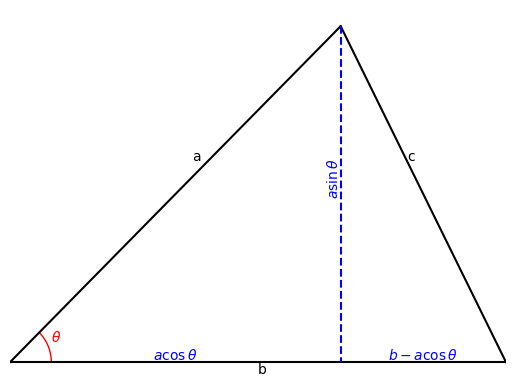

In [5]:
from myst_nb import glue
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


f,ax = plt.subplots()
ax.set_xlim([-0.,3])
ax.set_ylim([-0.1,2.1])
ax.set_axis_off()
ax.plot([0,2],[0,2],color='black')
ax.plot([2,3],[2,0],color='black')
ax.plot([0,3],[0,0],color='black')
ax.plot([2,2],[2,0],'--',color='b')

ax.annotate("a",(1.1,1.2))
ax.annotate("b", (1.5,0),verticalalignment="top")
ax.annotate("c", (2.4,1.2))
ax.annotate(r"$\theta$", (0.25,0.125),color="red")
ax.annotate(r"$a\cos\theta$", (1.,0.),color="blue", horizontalalignment="center" ,verticalalignment="bottom")
ax.annotate(r"$b-a\cos\theta$", (2.5,0.),color="blue", horizontalalignment="center",verticalalignment="bottom")
ax.annotate(r"$a\sin\theta$", (2.,0.99),color="blue", horizontalalignment="right",rotation=90.)
pac = mpatches.Arc([0, 0], 0.5, 0.5, angle=0, theta1=0, theta2=45.,color="red")
ax.add_patch(pac)

glue("geom_vector", f, display=False)

````{prf:lemma}
:label: perfsquareneg

We establish that $||\mathbf{x} - \mathbf{y} ||^2 = ||\mathbf{x}||^2 + ||\mathbf{y}||^2 - 2\mathbf{x}^\top \mathbf{y}$

$$
\begin{align}
||\mathbf{x} - \mathbf{y} ||^2 &= (\mathbf{x} - \mathbf{y})^\top (\mathbf{x} - \mathbf{y})\\
&= (\mathbf{x} - \mathbf{y})^\top  \mathbf{x}  \quad - \quad   (\mathbf{x} - \mathbf{y})^\top  \mathbf{y} & (\text{Dot product is bilinear})\\
&=  \mathbf{x}^\top \mathbf{x} - \mathbf{x}^\top \mathbf{y} - \mathbf{x}^\top \mathbf{y} +  \mathbf{y}^\top \mathbf{y}&(\text{Dot product is bilinear})\\
&= ||\mathbf{x} ||^2 - 2\mathbf{x}^\top\mathbf{y} + ||\mathbf{y}||^2
\end{align}
$$
````


````{prf:proposition}

We now establish that $\cos\theta = \frac{\mathbf{x}^\top \mathbf{y}}{||\mathbf{x}|| \, ||\mathbf{y}|| }$ for the 2D case.

From the triangle used in {prf:ref}`lawcosines`, we set $a = ||\mathbf{x}||, b = || \mathbf{y} || $ and $c = ||\mathbf{x} - \mathbf{y} ||$,
By rewriting {prf:ref}`lawcosines` with those substitutions we have that :

$$
\begin{align}
 ||\mathbf{x} - \mathbf{y} ||^2 &= ||\mathbf{x}||^2 + ||\mathbf{y}||^2 - 2 || \mathbf{x} ||\, ||\mathbf{y}|| \, \cos\theta \\
\end{align}
$$

Calling to {prf:ref}`perfsquareneg` we rewrite to:

$$
\begin{align}
 ||\mathbf{x}||^2 -2\mathbf{x}^\top\mathbf{y} + ||\mathbf{y} ||^2 &= ||\mathbf{x}||^2 + ||\mathbf{y}||^2 - 2 || \mathbf{x} ||\, ||\mathbf{y}|| \, \cos\theta \\
- 2 || \mathbf{x} ||\, ||\mathbf{y}|| \, \cos\theta &= -2\mathbf{x}^\top\mathbf{y} \\
\cos\theta &= \frac{\mathbf{x}^\top\mathbf{y} }{  || \mathbf{x} ||\, ||\mathbf{y}||  }
\end{align}
$$
````

We can finally provide a generalized formulation of **Pythagoras theorem** by setting the sides of a right angle triangle to $a = ||\mathbf{x} ||, b = ||\mathbf{y} ||, c=||\mathbf{x}+\mathbf{y}||$. An expansion from $c$ provides the theorem  

$$
\begin{align*}
  ||\mathbf{x}+\mathbf{y}||^2 &= (\mathbf{x}+\mathbf{y})^T (\mathbf{x}+\mathbf{y}) \\
                                        &=  (\mathbf{x}+\mathbf{y})^T \mathbf{x} + (\mathbf{x}+\mathbf{y})^T \mathbf{y} & \text{ (bilinearity of dot product)}\\
                                   &= \mathbf{x}^T\mathbf{x} + \mathbf{x}^T \mathbf{y} + \mathbf{y}^T \mathbf{x} + \mathbf{y}^T\mathbf{y} &  \text{(bilinearity of dot product)}\\
                                     &= || \mathbf{x} ||^2 +2 \mathbf{x}^T \mathbf{y} + || \mathbf{y} ||^2
\end{align*}
$$
As a right angle has $\cos\theta = 0$, it implies that vectors are **orthogonal** when their dot product $\mathbf{x}^\top\mathbf{y} = 0$. This allows us to establish the theorem:

$$
||\mathbf{x}+\mathbf{y}||^2 = || \mathbf{x} ||^2 + || \mathbf{y} ||^2
$$